# Исследование рынка заведений общественного питания в Москве <a id='sadf'></a>

**Цель проекта: подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.**

**Входные данные: датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.**

## Общая информация и подготовка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

import plotly.express as px
from plotly import graph_objects as go
from numpy import median


import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "C:\\Users\\stupe\\python\\Proect_rinok_obshepit\\"
data = pd.read_csv(path +'moscow_places.csv')

In [3]:
data.sample(5)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
2802,Pho Viet,ресторан,"Москва, Открытое шоссе, 4с1",Восточный административный округ,"ежедневно, 10:00–22:00",55.809204,37.729379,4.3,NaN,NaN,NaN,NaN,1,NaN
3138,Моремания,ресторан,"Москва, Минская улица, 14А",Западный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.738849,37.484754,4.6,NaN,Средний счёт:1000–2000 ₽,1500.0,NaN,1,NaN
3293,Шаверма,быстрое питание,"Москва, Мукомольный проезд, 11",Центральный административный округ,"ежедневно, круглосуточно",55.754267,37.522572,4.0,низкие,Средний счёт:50–250 ₽,150.0,NaN,1,10.0
8347,Compass Coffee&Bakery,кафе,"Москва, Окская улица, 1, корп. 1",Юго-Восточный административный округ,"пн-пт 10:00–22:00; сб,вс 11:00–22:00",55.712435,37.752065,4.0,NaN,Средний счёт:300–400 ₽,350.0,NaN,0,80.0
7988,MainFood,кофейня,"Москва, Каширское шоссе, 61Г",Южный административный округ,"ежедневно, 10:00–22:00",55.622056,37.713590,4.5,NaN,NaN,NaN,NaN,0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


В данных представлены сведения о 8406 заведениях.

14 столбцов содеражат информацию:
- name — название заведения;
- address — адрес заведения;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- lat — широта географической точки, в которой находится заведение;
- lng — долгота географической точки, в которой находится заведение;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»;
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки);
- district — административный район, в котором находится заведение, например Центральный административный округ;
- seats — количество посадочных мест.

## Предобработка данных

In [5]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

Пропуски встречаются в 6 столбцах: hours, price, avg_bill, middle_avg_bil, middle_coffee_cup, seats. Столбец middle_coffee_cup имеет 7871 пропуска в 8406 строках, что говорит о его крайне низкой информативности. Столбцы price, avg_bill, middle_avg_bill имееют более 50 процентов пропусков. Нет возможности для корректного восстановления пропущенных значений, поэтому эти данные будут оставлены без изменения.

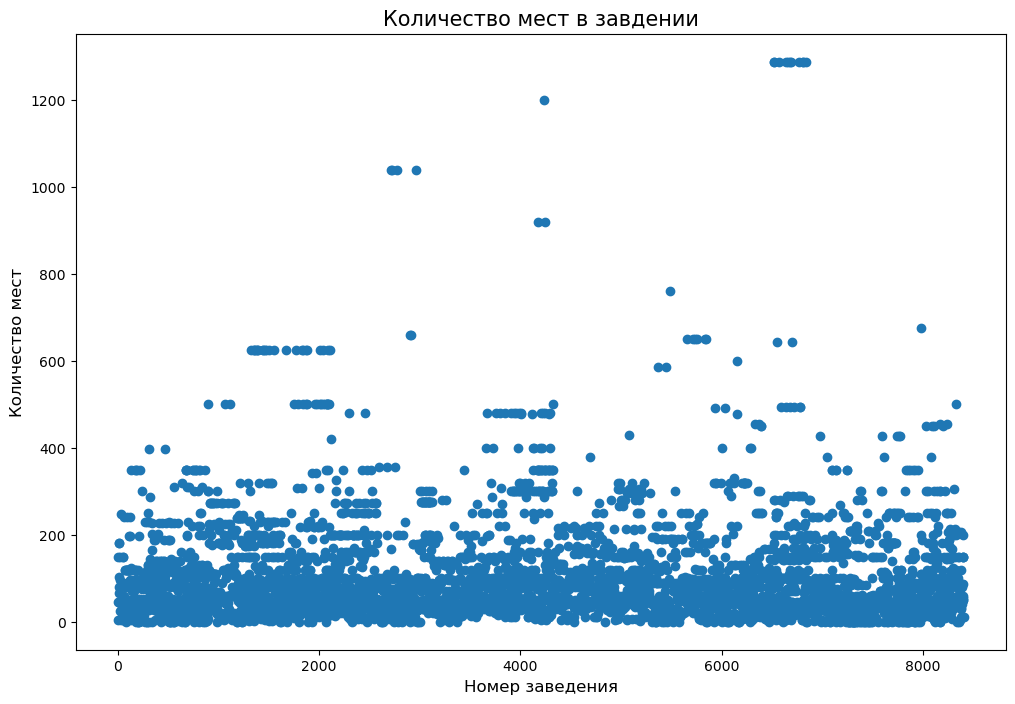

In [6]:
x_values = pd.Series(range(0,len(data['seats'])))
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x_values, data['seats'])
plt.title('Количество мест в завдении', fontsize = 15)
plt.xlabel('Номер заведения', fontsize = 12)
plt.ylabel('Количество мест', fontsize = 12);

Заведений с количеством посадочных мест больше 400 крайне мало.

In [7]:
np.nanpercentile(data['seats'], [90, 95, 99])

array([240., 307., 625.])

Менее 1 процента заведений имеют 625 посадочных мест.

In [8]:
data_clear = data[~(data['seats'] > np.nanpercentile(data['seats'], 99))]

Заведения с количеством посадочных мест больше 625 удалены из данных.

In [9]:
print(f'Количество дубликатов в таблице data равно {data_clear.duplicated().sum()}.')

Количество дубликатов в таблице data равно 0.


В данных отсутствуют явные дубликаты.

In [10]:
data_clear['clean_name'] = data['name'].str.lower()
data_clear[data_clear.duplicated(subset=['clean_name', 'address'], keep=False)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,clean_name
1430,More poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,0,188.0,more poke
1511,More Poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0,more poke
2211,Раковарня Клешни и Хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",55.810553,37.638161,4.4,NaN,NaN,NaN,NaN,0,150.0,раковарня клешни и хвосты
2420,Раковарня Клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,1,150.0,раковарня клешни и хвосты
3091,Хлеб да Выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",55.738886,37.411648,4.1,NaN,NaN,NaN,NaN,1,276.0,хлеб да выпечка
3109,Хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0,хлеб да выпечка


В данных присутствуют 3 пары неявных дубликатов.

In [11]:
data_clear = data_clear.drop(index= [1430,2211,3091])

Неявные дубликаты удалены.

In [12]:
print(f'Отношение очищенных данных к первоначальным составляет {round(data_clear.shape[0] / data.shape[0],3)}.')

Отношение очищенных данных к первоначальным составляет 0.996.


In [13]:
data = data_clear

In [14]:
data['street'] = data ['address'].str.split(', ').str[1]

Создан столбец street с названиями улиц из столбца с адресом.

In [15]:
def add_24_7(row):
    
    if str(row['hours']).find('ежедневно, круглосуточно')!=-1:
        return True
    else:
        return False

data['is_24/7'] = data.apply(add_24_7, axis=1)

Создан столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
- логическое значение True — если заведение работает ежедневно и круглосуточно;
- логическое значение False — в противоположном случае.

## Анализ данных 

### Количество объектов общественного питания по категориям  

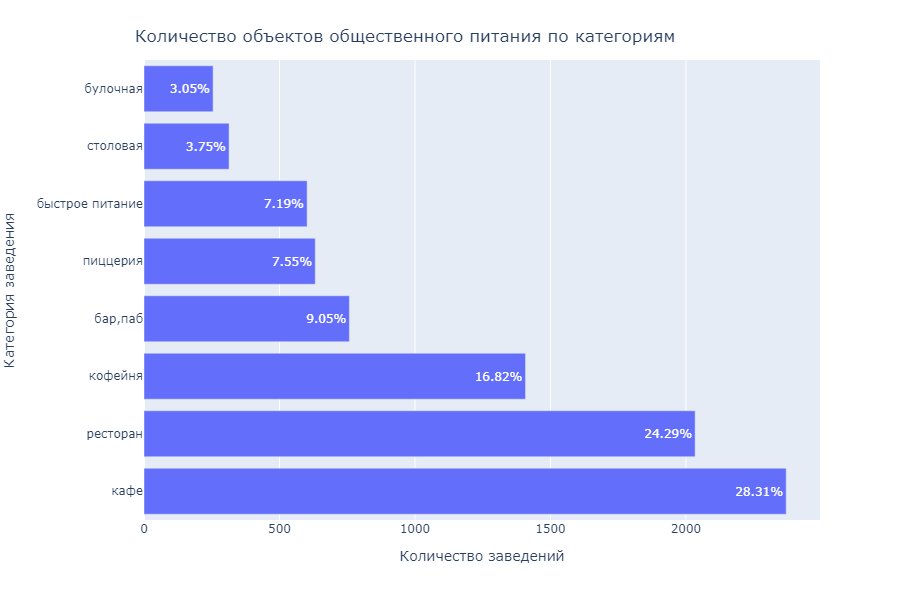

In [16]:
data_category = pd.DataFrame(data['category'].value_counts()).reset_index()
data_category = pd.DataFrame(data['category'].value_counts()).reset_index()
data_category['percentage'] = round((data_category['category']/data_category['category'].sum()) * 100,2)

fig = px.bar(data_category , y="index", x="category",
             height=400,
             text = data_category['percentage'].astype(str)+'%')

fig.update_layout(title={'text':'Количество объектов общественного питания по категориям',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  width=900, 
                  height=600,
                  xaxis_title='Количество заведений',
                  yaxis_title='Категория заведения')

pio.renderers.default = 'png'
pio.write_image(fig, 'graph.png')

fig.show()

В данных представлены 8406 заведений, распределенные по 8 категориям: кафе, ресторан, кофейня, бар/паб, пиццерия, быстрое питание, столовая, булочная.

Из них к категории кафе относятся - 2370 (28,3%), ресторан - 2034 (24,3%), кофейня - 1408 (16,8%), бар/паб - 758 (9,05%), пиццерия -  632 (7,55%), быстрое питание - 602 (7,19%), столовая - 3114 (3,75%), булочная - 255 (3,05%).

### Количество посадочных мест по категориям

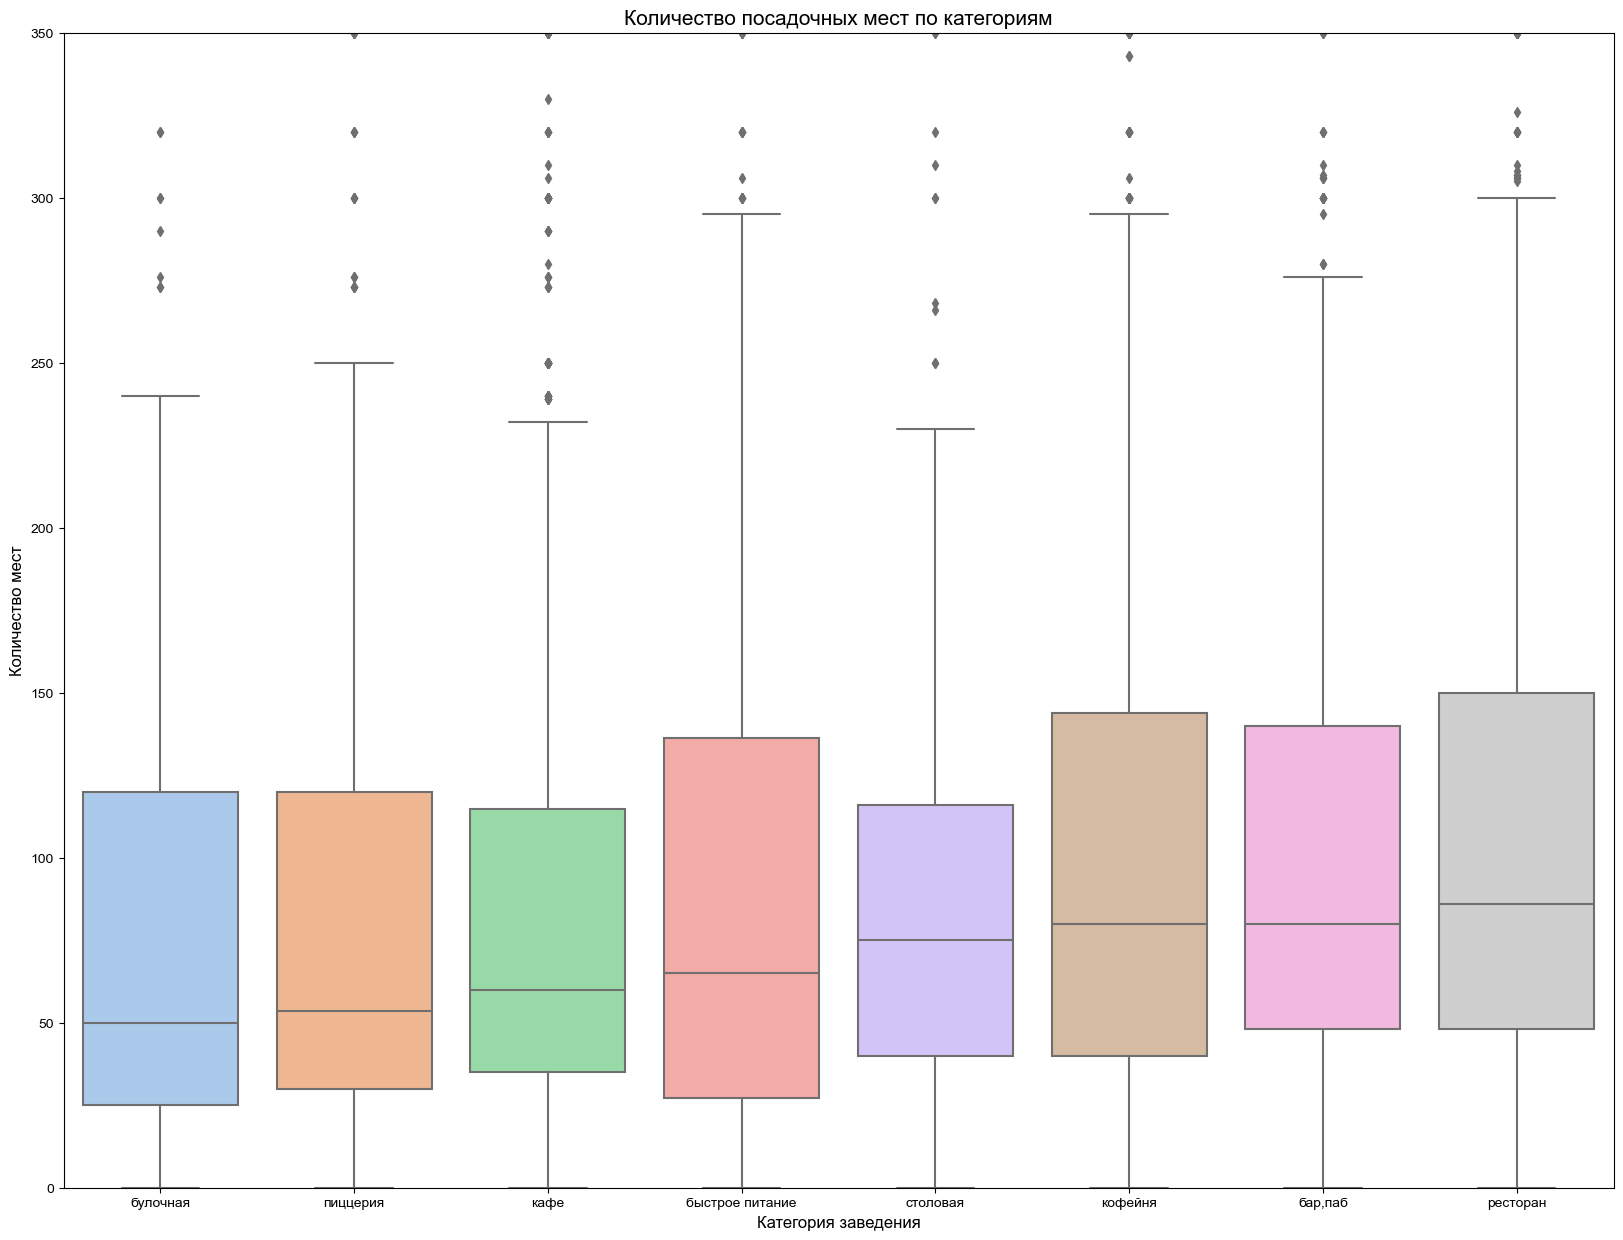

In [17]:
fig, ax = plt.subplots(figsize=(20,15))
sns.set_style('darkgrid')
ordered_categories = ['булочная', 'пиццерия', 'кафе', 'быстрое питание', 'столовая', 'кофейня', 'бар,паб', 'ресторан']

sns.boxplot(ax = ax, data=data, x='category', y='seats', palette="pastel", order=ordered_categories);

plt.title('Количество посадочных мест по категориям', fontsize = 15)
plt.xlabel('Категория заведения', fontsize = 12)
plt.ylabel('Количество мест', fontsize = 12)
plt.ylim(0,350)
plt.show();

Медианное значение количества посадочных мест по категориям заведений изменяется в пределах от 50 для булочных до 90 для ресторанов. Для всех категорий заведений заметны выбросы в количестве посадочных мест.

### Соотношение сетевых и несетевых заведений в датасете

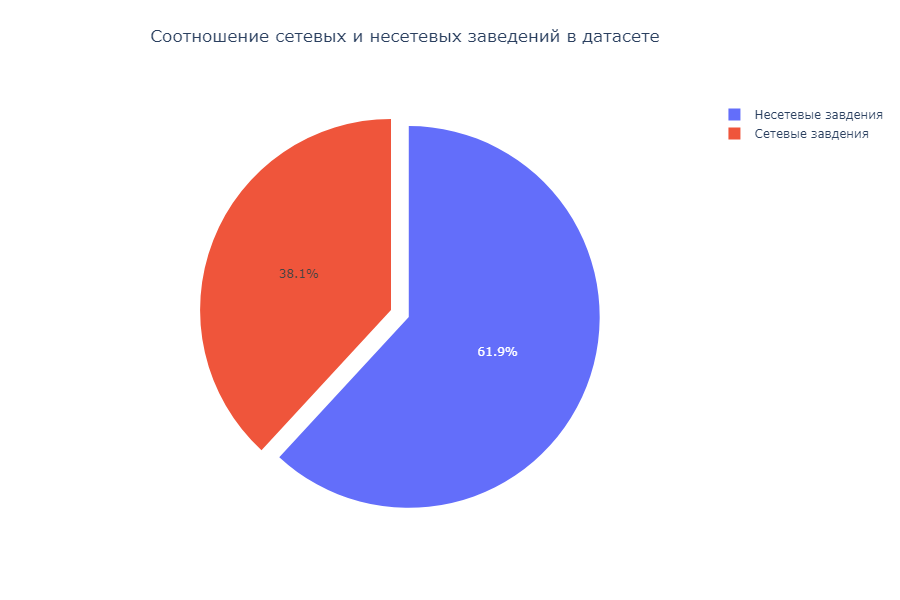

In [18]:
data_сhain = pd.DataFrame(data['chain'].value_counts()).reset_index()
data_сhain = data_сhain.replace([0, 1],['Несетевые завдения', 'Сетевые завдения'])
fig = go.Figure(data=[go.Pie(labels=data_сhain['index'],
                             values=data_сhain['chain'], 
                             pull = [0.1, 0])]) 
fig.update_layout(title={'text':'Соотношение сетевых и несетевых заведений в датасете',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  width=900, # указываем размеры графика
                  height=600)
fig.show()

Большая часть заведений не являются частью какой-либо сети или заданной корпоративной структуры. Их численность составляет 5180 заведений (61.9%).

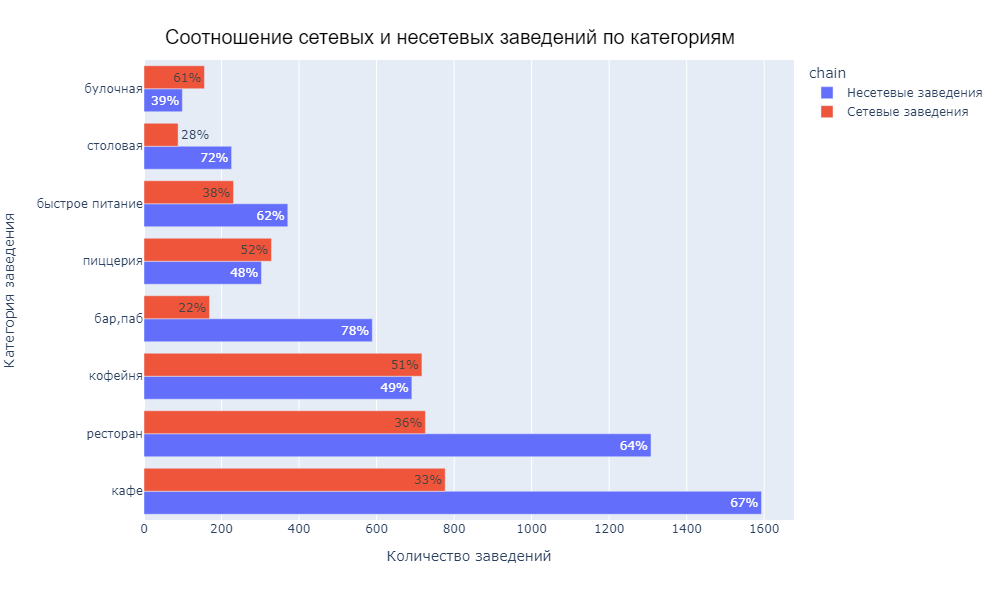

In [19]:
data_chain_category = data.groupby(['category', 'chain'], \
                        as_index = False)[['name']].count().sort_values('name', ascending = False)
data_chain_category = data_chain_category.replace([0, 1],['Несетевые заведения', 'Сетевые заведения']).reset_index()
data_chain_category['total_count'] = data_chain_category.groupby('category')[['name']].transform('sum')
data_chain_category['percentage'] = round((data_chain_category['name'] / data_chain_category['total_count']) * 100,).astype(int)



fig = px.bar(data_chain_category, x="name", y="category",
             color='chain',
             height=400,
             barmode='group', 
             text=data_chain_category['percentage'].astype(str)+'%')

fig.update_layout(title={'text':'Соотношение сетевых и несетевых заведений по категориям',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  title_font={'size': 20, 'family': 'Arial', 'color': 'black'},
                  width=1000, 
                  height=600,
                  xaxis_title='Количество заведений',
                  yaxis_title='Категория заведения',
                  yaxis=dict(
                             categoryorder='total descending'
                   ))
                  



fig.show()

Булочные, пиццерии, кофейни чаще являются сетевыми.

In [20]:
data_chain_category

,index,category,chain,name,total_count,percentage
0,6,кафе,Несетевые заведения,1593,2370,67
1,12,ресторан,Несетевые заведения,1308,2034,64
2,7,кафе,Сетевые заведения,777,2370,33
3,13,ресторан,Сетевые заведения,726,2034,36
4,9,кофейня,Сетевые заведения,717,1408,51
5,8,кофейня,Несетевые заведения,691,1408,49
6,0,"бар,паб",Несетевые заведения,589,758,78
7,4,быстрое питание,Несетевые заведения,371,602,62
8,11,пиццерия,Сетевые заведения,329,632,52
9,10,пиццерия,Несетевые заведения,303,632,48


### Топ-15 популярных сетей в Москве

In [21]:
top_15 = data.groupby(['name', 'category', 'chain'], \
                        as_index = False)[['address']].count().sort_values('address', ascending = False).query('chain == 1').reset_index().head(15)

top_15

,index,name,category,chain,address
0,5918,Шоколадница,кофейня,1,117
1,2738,Домино'с Пицца,пиццерия,1,76
2,2703,Додо Пицца,пиццерия,1,74
3,1207,One Price Coffee,кофейня,1,70
4,5994,Яндекс Лавка,ресторан,1,68
5,432,Cofix,кофейня,1,65
6,1355,Prime,ресторан,1,49
7,2999,КОФЕПОРТ,кофейня,1,42
8,3516,Кулинарная лавка братьев Караваевых,кафе,1,39
9,5120,Теремок,ресторан,1,36


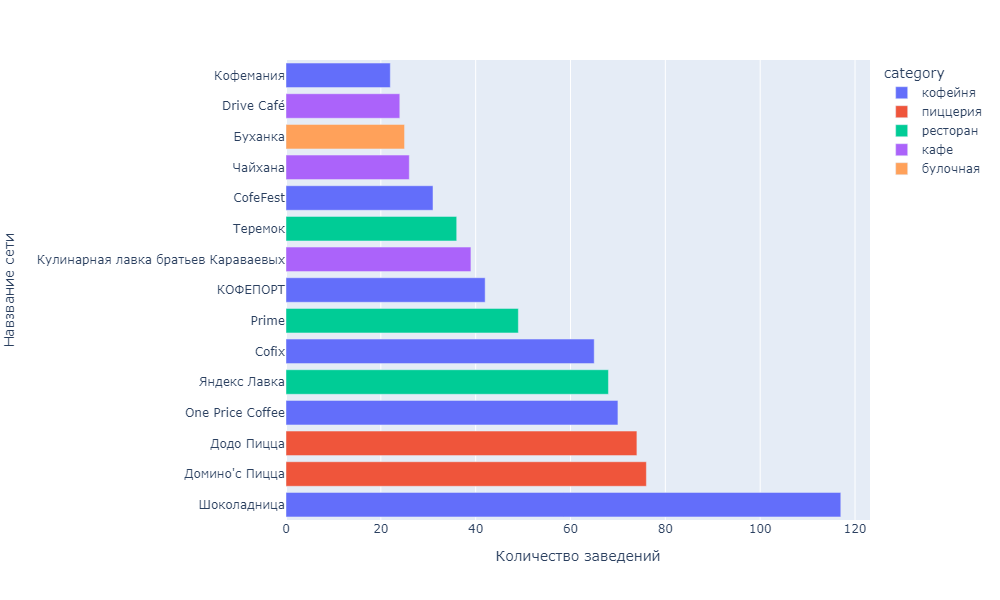

In [22]:
top_15 = data.groupby(['name', 'category', 'chain'], \
                        as_index = False)[['address']].count().sort_values('address', ascending = False).query('chain == 1').reset_index().head(15)



fig = px.bar(top_15 , x="address", y="name",
             color = 'category',
             height=400)

fig.update_layout(title={'text':'',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  title_font={'size': 20, 'family': 'Arial', 'color': 'black'},
                  width=1000, 
                  height=600,
                  xaxis_title='Количество заведений',
                  yaxis_title='Навзвание сети',
                  yaxis=dict(
                             categoryorder='total descending'
                   ))



fig.show()

В топ-15 сетей в Москве входят достаточно бюджетные сети кафе, кофеен, булочных, пиццерий и ресторанов. Бары, столовые не представлены какой либо-популярной сетью в топе.

### Количество заведений по административным районам Москвы

In [23]:
data['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

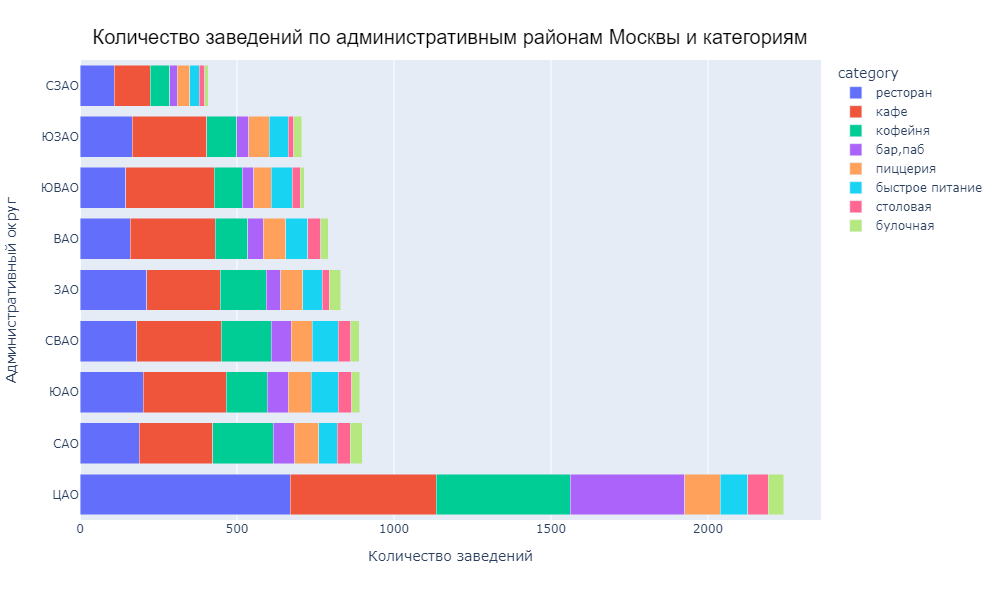

In [24]:
data_district = data.groupby(['district', 'category'], \
                        as_index = False)[['name']].count().sort_values('name', ascending = False).reset_index()

data_district = data_district.replace(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'],['САО',
       'СВАО',
       'СЗАО',
       'ЗАО',
       'ЦАО',
       'ВАО',
       'ЮВАО',
       'ЮАО',
       'ЮЗАО'])

fig = px.bar(data_district, x="name", y="district",
             color='category',
             height=400,
             barmode='stack')

fig.update_layout(title={'text':'Количество заведений по административным районам Москвы и категориям',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  title_font={'size': 20, 'family': 'Arial', 'color': 'black'},
                  width=1000, 
                  height=600,
                  xaxis_title='Количество заведений',
                  yaxis_title='Административный округ',
                  yaxis=dict(
                             categoryorder='total descending'
                   ))
                  



fig.show()

В данных представлены 9 административных округов Москвы: Северный административный округ, Северо-Восточный административный округ, Северо-Западный административный округ, Западный административный округ, Центральный административный округ, Восточный административный округ, Юго-Восточный административный округ, Южный административный округ, Юго-Западный административный округ.

Центральный административный округ(ЦАО) является лидером по количеству заведений. Соотношение заведений по категориям между округами примерно одинаково, за исключением ЦАО, где рестораны имеют наибольшее распространение, а бары/пабы уверенно занимают 4 место по популярности.

### Распределение средних рейтингов по категориям заведений

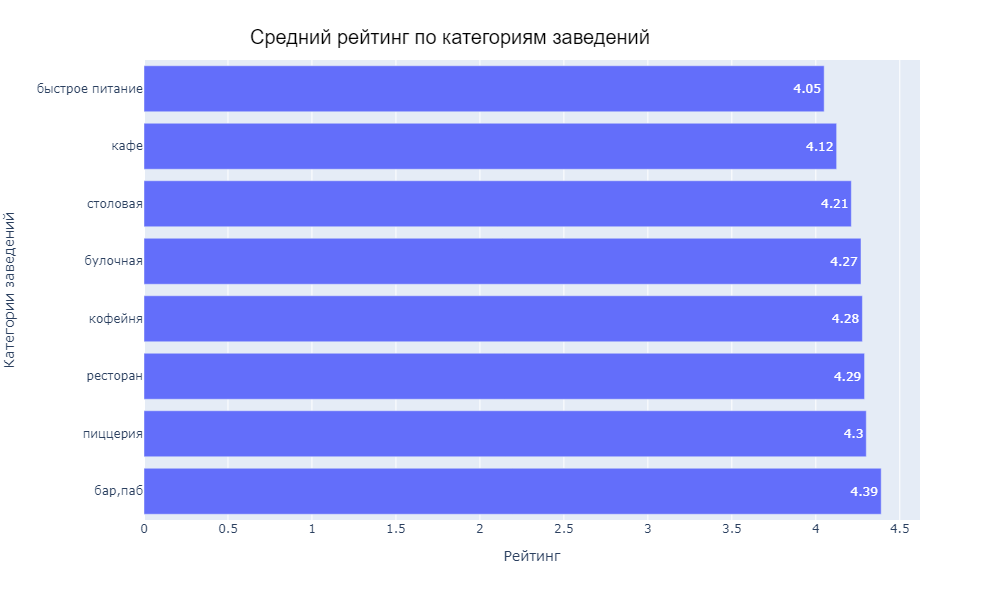

In [25]:
category_rating = data.groupby('category', \
                               as_index = False)[['rating']].mean().sort_values('rating', ascending = False).reset_index()
fig = px.bar(category_rating, x="rating", y="category",
             height=400,
            text=round(category_rating['rating'],2))

fig.update_layout(title={'text':'Средний рейтинг по категориям заведений',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  title_font={'size': 20, 'family': 'Arial', 'color': 'black'},
                  width=1000, 
                  height=600,
                  xaxis_title='Рейтинг',
                  yaxis_title='Категории заведений')
                  



fig.show()

Средний рейтинг заведений по категориям изменяется в пределах от 4.05 для заведений быстрого питания  до 4.39 для баров/пабов.

### Средний рейтинг заведений каждого района

In [26]:
rating_ds = data.groupby('district', as_index=False)['rating'].agg('mean')
rating_ds['rating'] = round(rating_ds['rating'],2)

rating_ds

,district,rating
0,Восточный административный округ,4.17
1,Западный административный округ,4.18
2,Северный административный округ,4.24
3,Северо-Восточный административный округ,4.15
4,Северо-Западный административный округ,4.21
5,Центральный административный округ,4.38
6,Юго-Восточный административный округ,4.10
7,Юго-Западный административный округ,4.17
8,Южный административный округ,4.18


Средний рейтинг заведений по округам изменяется в пределах от 4.10 для ЮВАО до 4.38 для ЦАО

### Топ-15 улиц по количеству заведений

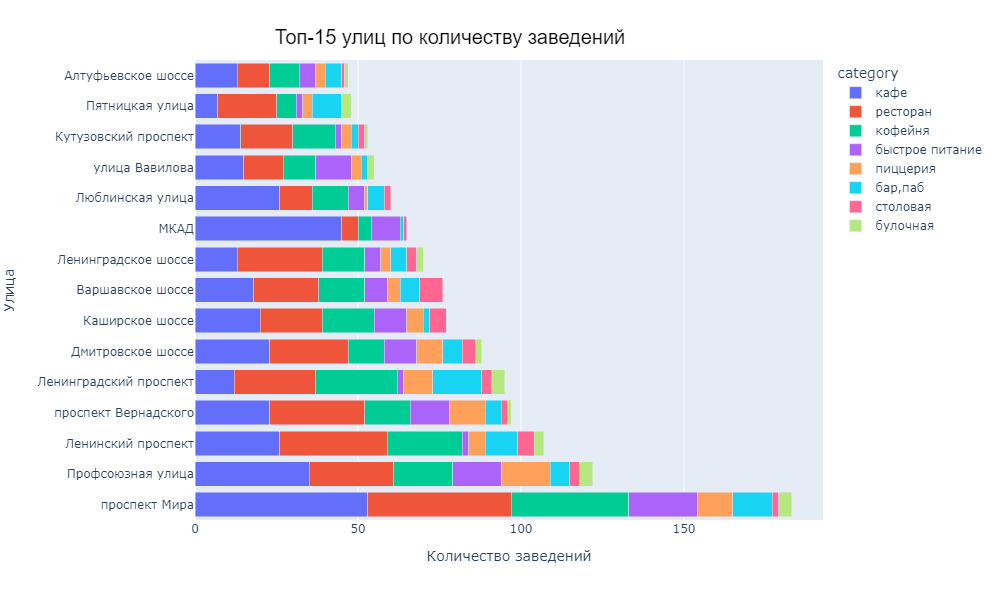

In [27]:
streets_category = data.groupby(['street', 'category'], \
                        as_index = False)[['name']].count().sort_values('name', ascending = False).reset_index()

top_15_streets = data['street'].value_counts().reset_index().head(15) 
list_top=top_15_streets['index'].unique()

streets_category_top_15  = streets_category.query('street in @list_top')

fig = px.bar(streets_category_top_15 , x="name", y="street",
             color=streets_category_top_15 ['category'],
             height=400,
             barmode='stack')

fig.update_layout(title={'text':'Топ-15 улиц по количеству заведений',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  title_font={'size': 20, 'family': 'Arial', 'color': 'black'},
                  width=1000, 
                  height=600,
                  xaxis_title='Количество заведений',
                  yaxis_title='Улица',
                  yaxis=dict(
                             categoryorder='total descending'
                   ))



fig.show()

В топ-15 улиц по количеству заведений преимущественно представлены наиболее протяженные проспекты и шоссе города Москва. Категориальный состав заведений на этих улицах не сильно различается, за иключеним МКАД, где около 2/3 заведений представлены кафе.

In [28]:
only_one = streets_category.groupby('street', \
                        as_index = False)['name'].sum().query('name == 1')
list_only_one = only_one['street'].unique()

streets_category_only_one = streets_category.query('street in @list_only_one')
streets_category_only_one

,index,street,category,name
1569,2616,Шоссейный проезд,"бар,паб",1
1583,2549,Челобитьевское шоссе,ресторан,1
1586,2550,Челюскинская улица,ресторан,1
1597,2541,Центральный парк культуры и отдыха имени М. Го...,кафе,1
1608,2545,Чапаевский переулок,кафе,1
...,...,...,...,...
3801,1521,Москворецкая набережная,кофейня,1
3810,1522,Московская улица,кафе,1
3812,1523,Московский проспект,пиццерия,1
3819,1535,Мурановская улица,ресторан,1


В данных представлены 458 улиц, на которых находится всего одно заведение. В большинстве своем это малопротяженные улицы и переулки.

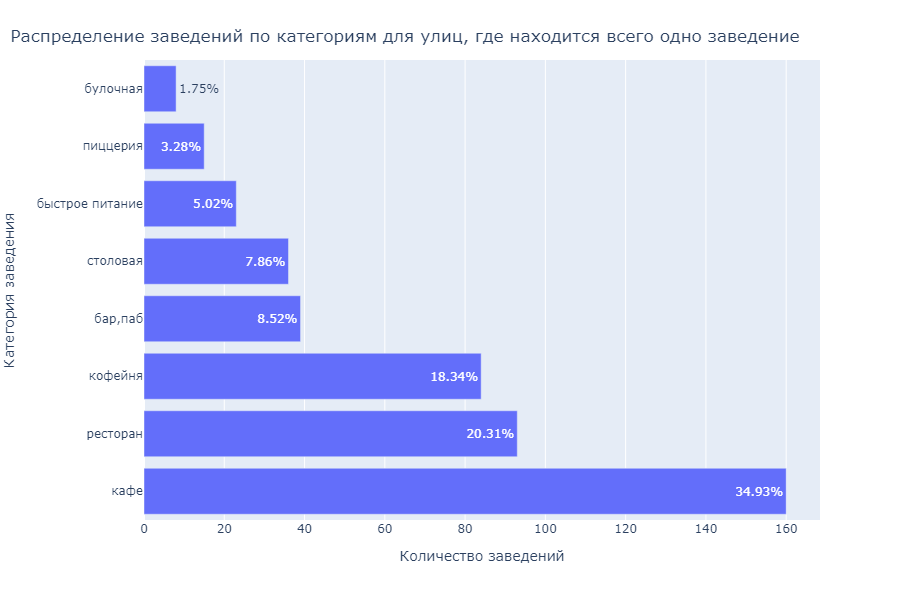

In [29]:
streets_category_only_one = streets_category_only_one.groupby('category',\
                                                              as_index = False)['name'].sum().sort_values('name', ascending = False)
streets_category_only_one['percentage'] = round((streets_category_only_one['name']/streets_category_only_one['name'].sum()) * 100,2)

fig = px.bar(streets_category_only_one , y="category", x="name",
             height=400,
             text = streets_category_only_one['percentage'].astype(str)+'%')


fig.update_layout(title={'text':'Распределение заведений по категориям для улиц, где находится всего одно заведение',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  width=900, # указываем размеры графика
                  height=600,
                  xaxis_title='Количество заведений',
                  yaxis_title='Категория заведения')
fig.show()

Распределение заведений по категориям для улиц, где находится всего одно заведение, очень похоже на аналогичное распределение по всем заведениям.

### Медианная стоимость заказа в рублях для каждого района.

In [30]:
median_district = data.groupby('district', \
                        as_index = False)[['middle_avg_bill']].median().sort_values('middle_avg_bill', ascending = False).reset_index()
median_district

,index,district,middle_avg_bill
0,1,Западный административный округ,1000.0
1,5,Центральный административный округ,1000.0
2,4,Северо-Западный административный округ,700.0
3,2,Северный административный округ,650.0
4,7,Юго-Западный административный округ,600.0
5,0,Восточный административный округ,550.0
6,3,Северо-Восточный административный округ,500.0
7,8,Южный административный округ,500.0
8,6,Юго-Восточный административный округ,450.0


Медианная стоимость заказа по округам изменяется в пределах от 450 рублей для ЮВАО, ЮАО, СВАО до 1000 рублей для ЦАО и ЗАО. В целом, нельзя определить точную зависимость цен в заведении от его удаленности от центра.

### Вывод по главе 3

На данном этапе было выяснено, что:
- 8406 заведений, распределены по 8 категориям: кафе, ресторан, кофейня, бар/паб, пиццерия, быстрое питание, столовая, булочная.
- Медианное значение количества посадочных мест по категориям заведений изменяется от 50 до 90.
- Большая часть заведений не являются частью какой-либо сети или заданной корпоративной структуры.
- Булочные, пиццерии, кофейни чаще являются сетевыми.
- В топ-15 сетей в Москве входят достаточно бюджетные сети кафе, кофеен, булочных, пиццерий и ресторанов.
- Центральный административный округ является лидером по количеству заведений.
- Средний рейтинг заведений по категориям изменяется в пределах от 4.05 для заведений быстрого питания  до 4.39 для баров/пабов.
- Средний рейтинг заведений по округам изменяется в пределах от 4.10 для ЮВАО  до 4.38 для ЦАО.
- В топ-15 улиц по количеству заведений преимущественно представлены наиболее протяженные проспекты и шоссе города Москва.
- Медианная стоимость заказа по округам изменяется в пределах от 450 рублей для ЮВАО, ЮАО, СВАО до 1000 рублей для ЦАО и ЗАО.

## Детализация исследования

### Распределение кофеен по районам Москвы

В датасете представлена информация о 1408 кофейнях.


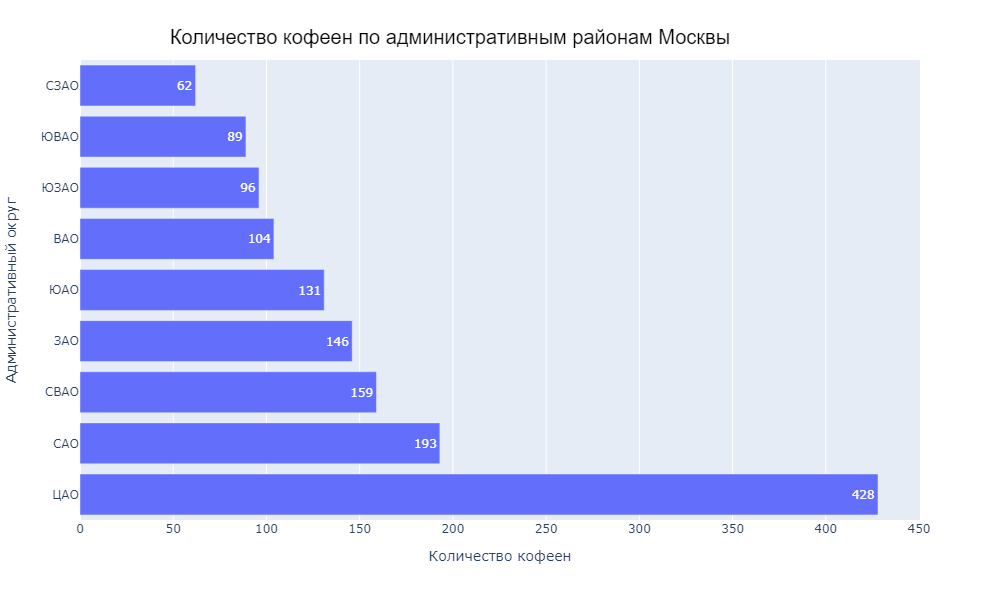

In [31]:
target = 'кофейня'

data_district_coffee = data_district.query('category == @target')

print(f'В датасете представлена информация о {data_district_coffee.name.sum()} кофейнях.')

fig = px.bar(data_district_coffee, x="name", y="district",
             height=400,
             text = 'name')

fig.update_layout(title={'text':'Количество кофеен по административным районам Москвы',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  title_font={'size': 20, 'family': 'Arial', 'color': 'black'},
                  width=1000, 
                  height=600,
                  xaxis_title='Количество кофеен',
                  yaxis_title='Административный округ',
                  yaxis=dict(
                             categoryorder='total descending'
                   ))
fig.show()

Тройкой лидеров по числу кофеен являются Центральный административный округ, Северный административный округ, Северо-Восточный административный округ, причем ЦАО лидирует со значительным отрывом от САО.

### Количество круглосуточных кофеен

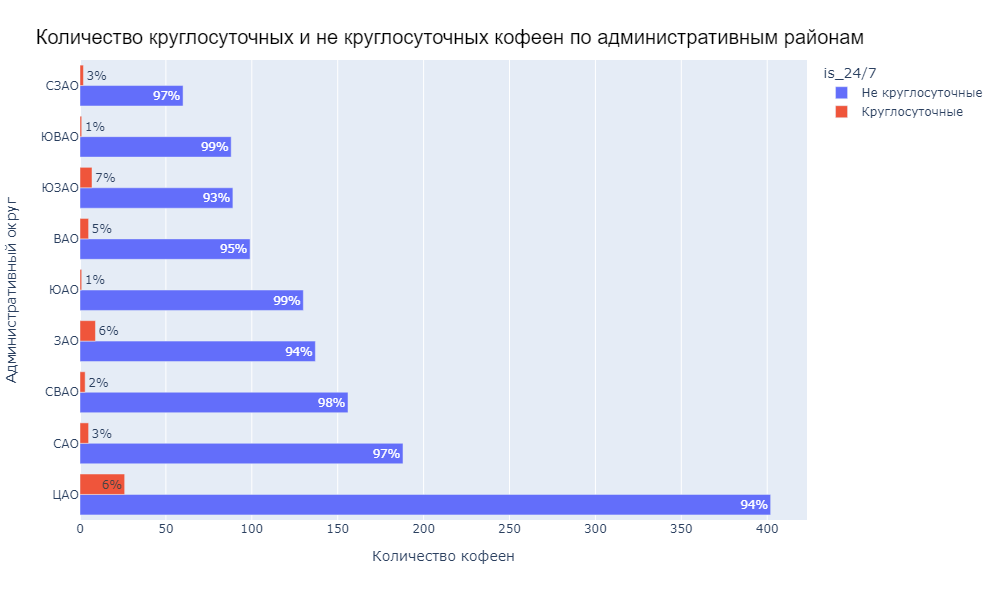

In [32]:
data_24_coffee = data.groupby(['category', 'is_24/7', 'district'], \
                        as_index = False)[['name']].count().sort_values('name', ascending = False)


data_24_coffee = data_24_coffee.query('category == @target')
data_24_coffee['total_count'] = data_24_coffee.groupby('district')[['name']].transform('sum')
data_24_coffee['percentage'] = round((data_24_coffee['name'] / data_24_coffee['total_count']) * 100,).astype(int)

data_24_coffee = data_24_coffee.replace([True, False, 'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'],['Круглосуточные', 'Не круглосуточные','САО',
       'СВАО',
       'СЗАО',
       'ЗАО',
       'ЦАО',
       'ВАО',
       'ЮВАО',
       'ЮАО',
       'ЮЗАО'])

fig = px.bar(data_24_coffee, x="name", y="district",
             color='is_24/7',
             height=400,
             barmode='group', 
             text=data_24_coffee['percentage'].astype(str)+'%')

fig.update_layout(title={'text':'Количество круглосуточных и не круглосуточных кофеен по административным районам',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                   title_font={'size': 20, 'family': 'Arial', 'color': 'black'},
                  width=1000, 
                  height=600,
                  xaxis_title='Количество кофеен',
                  yaxis_title='Административный округ',
                  yaxis=dict(
                             categoryorder='total descending'
                   ))
                  
fig.show()

Круглосуточные кофейни имеют весьма скромное распространение по административным округам: их доля среди всех кофеен доходит до 7 процентов, но гораздо чаще ограничивается 2-5 процентами. Наибольшее относительное количество круглосуточных кофеен расположено в ЮЗАО. 

### Распределение рейтинга кофеен по районам

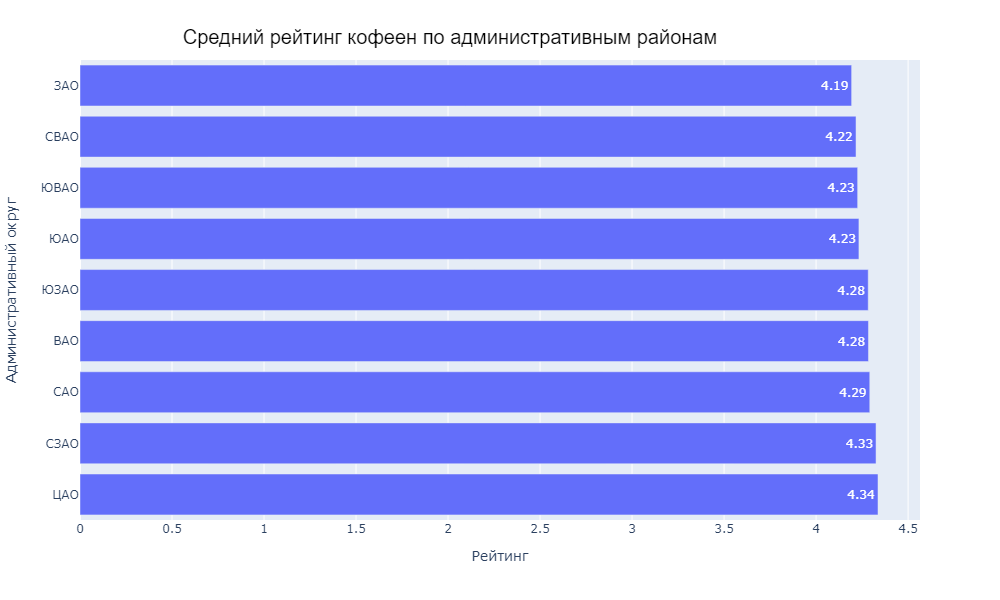

In [33]:
coffee_rating = data.groupby(['category', 'district'], \
                             as_index = False)[['rating']].mean().sort_values('rating', ascending = False).reset_index()
coffee_rating = coffee_rating.replace(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'],['САО',
       'СВАО',
       'СЗАО',
       'ЗАО',
       'ЦАО',
       'ВАО',
       'ЮВАО',
       'ЮАО',
       'ЮЗАО'])


coffee_rating = coffee_rating.query('category == @target')

fig = px.bar(coffee_rating, x="rating", y="district",
             height=400,
            text=round(coffee_rating['rating'],2))

fig.update_layout(title={'text':'Средний рейтинг кофеен по административным районам',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  title_font={'size': 20, 'family': 'Arial', 'color': 'black'},
                  width=1000, 
                  height=600,
                  xaxis_title='Рейтинг',
                  yaxis_title='Административный округ')
                  



fig.show()

Средний рейтинг заведений кофеен по административным районам изменяется в пределах от 4.19 для ЗАО до 4.34 для ЦАО.

### Стоимость чашки капучино 

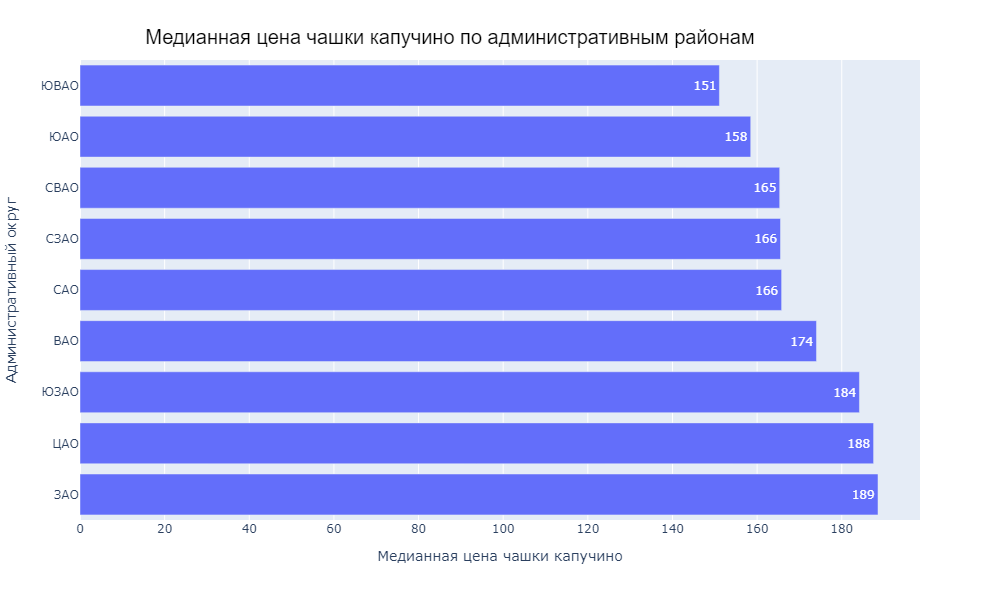

In [34]:
coffee_cup= data.groupby(['category', 'district'], \
                         as_index = False)[['middle_coffee_cup']].mean().sort_values('middle_coffee_cup', ascending = False).reset_index()
coffee_cup = coffee_cup.replace(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'],['САО',
       'СВАО',
       'СЗАО',
       'ЗАО',
       'ЦАО',
       'ВАО',
       'ЮВАО',
       'ЮАО',
       'ЮЗАО'])
coffee_cup = coffee_cup.query('category == @target')

fig = px.bar(coffee_cup, x="middle_coffee_cup", y="district",
             height=400,
            text=round(coffee_cup['middle_coffee_cup'],))

fig.update_layout(title={'text':'Медианная цена чашки капучино по административным районам',
                         'y': 0.95,
                         'x': 0.45, 
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  title_font={'size': 20, 'family': 'Arial', 'color': 'black'},
                  width=1000, 
                  height=600,
                  xaxis_title='Медианная цена чашки капучино',
                  yaxis_title='Административный округ')
                  


fig.show()

В зависимости от местоположения планируемой кофейни, стоит ориентироваться на цену чашки капучино от 151 рубля до 189 рублей.

### Вывод по главе 4

Перспективным местом для открытия новой кофейни я считаю Юго-Западный административный округ по следующим причинам:


1. В этом округе находятся 96 кофеен и он замыкает тройку округов с самым низким количеством кофеен. Это может означать, что конкуренция не высока и будет несложно привлечь новых клиентов.

2. В этом районе относительно много круглосуточных кофеен, это может означать, что спрос умеренно высок в любое время суток.

3. Средний рейтинг кофеен в этом районе равен 4.28 и занимает срединное положение в ранжированном списке среди всех срединных рейтингов кофеен по округам. Такой рейтинг может говорить о достаточно хорошей привлекательности данной локации для потенциальных клиентов.

4. Медианная цена чашки капучино в этом регионе составляет 184 рубля и входит в топ-3 лидеров по этому показателю. Этот показатель может служить хорошим маркером о стоимости жизни в этом районе и о том, сколько денег местные жители уже готовы тратить на кофейню.

## Презентация

Презентация: https://drive.google.com/file/d/1TnLMY1x-gLjLNTIeddAh0K_QGmXn2sti/view?usp=sharing